Importing Dependencies

In [82]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Loading the bangalore house price Dataset

In [37]:
df=pd.read_csv("/Users/adhyayanrathi/Downloads/bengaluru_house_prices.csv")

In [38]:
# Print First 5 rows of our DataFrame
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [39]:
df.shape

(13320, 9)

In [40]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [41]:
# check for missing values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

As we can see there are a lot of missin values in society and balcony so we'll drop both of them

In [42]:
#count of each type of area
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

# Data Cleaning

In [43]:
df1 = df.drop(['area_type' , 'society' , 'balcony' , 'availability'] , axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [44]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

The number of null values are low so we can either remove them or use there median or standard deviation

In [45]:
house_price_pred=df1.dropna()

In [46]:
house_price_pred.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Feature Engineering

In [47]:
house_price_pred['bhk'] = house_price_pred['size'].apply(lambda x: int(x.split(' ')[0]))
house_price_pred.bhk.unique()

<ipython-input-47-5f8558bc28d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_pred['bhk'] = house_price_pred['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [48]:
#making a separate column for bhk as int values

In [49]:
house_price_pred

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [50]:
house_price_pred[house_price_pred['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [51]:
# Check whether the value is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [52]:
house_price_pred[house_price_pred['total_sqft'].apply(is_float)]


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


Convert to averages

In [53]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if(len(tokens)) == 2:
        return ((float(tokens[0]) + float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [54]:
house_price_pred['total_sqft'] = house_price_pred["total_sqft"].apply(convert_sqft_to_num)

<ipython-input-54-5f6a0a51dba9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_pred['total_sqft'] = house_price_pred["total_sqft"].apply(convert_sqft_to_num)


In [55]:
house_price_pred = house_price_pred[house_price_pred.total_sqft.notnull()]


In [56]:
house_price_pred

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [57]:
house_price_pred['price_per_sqft'] = house_price_pred['price']*100000/house_price_pred['total_sqft']
house_price_pred.head()

<ipython-input-57-eccf2ddd46e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_pred['price_per_sqft'] = house_price_pred['price']*100000/house_price_pred['total_sqft']


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [58]:
len(house_price_pred.location.unique())

1298

1298 diffrent locations

Dimensionality Reduction to reduce the numbeer of Locations

In [59]:
house_price_pred.location = house_price_pred.location.apply(lambda x: x.strip())

/Users/adhyayanrathi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
location_stats = house_price_pred.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [61]:
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [62]:
len(location_stats[location_stats < 10])

1033

In [63]:
location_stas_less_than_10 = location_stats[location_stats < 10]
location_stas_less_than_10

location
Kaverappa Layout         9
B Narayanapura           9
2nd Phase JP Nagar       9
Banagiri Nagar           9
Chandra Layout           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Kannur                   1
whitefiled               1
Name: location, Length: 1033, dtype: int64

In [64]:
house_price_pred.location = house_price_pred.location.apply(lambda x : 'other' if x in location_stas_less_than_10 else x)
# all the locations less than 10 data points will be converted to 'other'

/Users/adhyayanrathi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
house_price_pred.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [66]:
house_price_pred1 = house_price_pred[~(house_price_pred.total_sqft/house_price_pred.bhk<300)]
house_price_pred1.shape

(12456, 7)

In [67]:
house_price_pred1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

clearly the minimum value of square feet cannot be 267 rupees and maximum cannot be 176470

Now we can remove these extreme cases based on Standard Deviation

In [68]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
house_price_pred2 = remove_pps_outliers(house_price_pred1)
house_price_pred2.shape


(10222, 7)

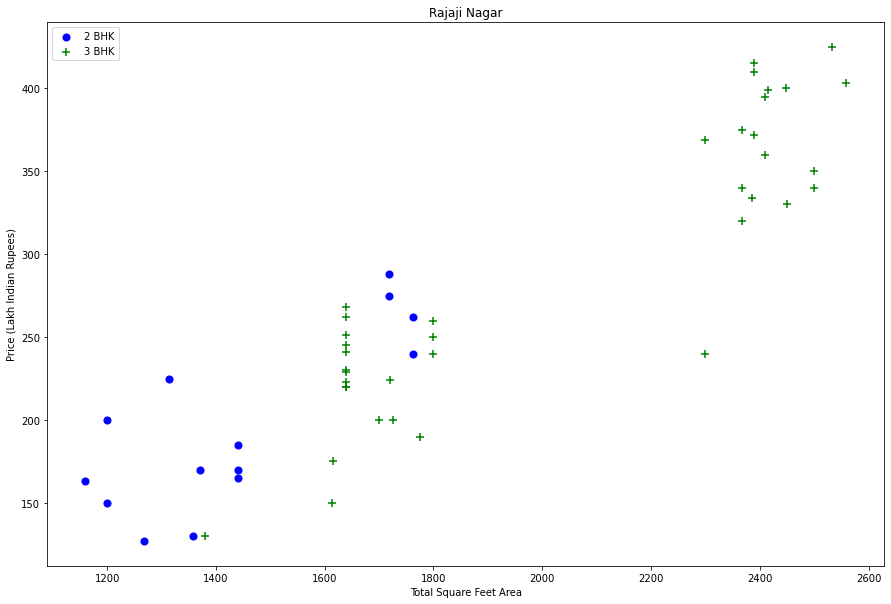

In [69]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50) # s is the marker size
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(house_price_pred2,"Rajaji Nagar")


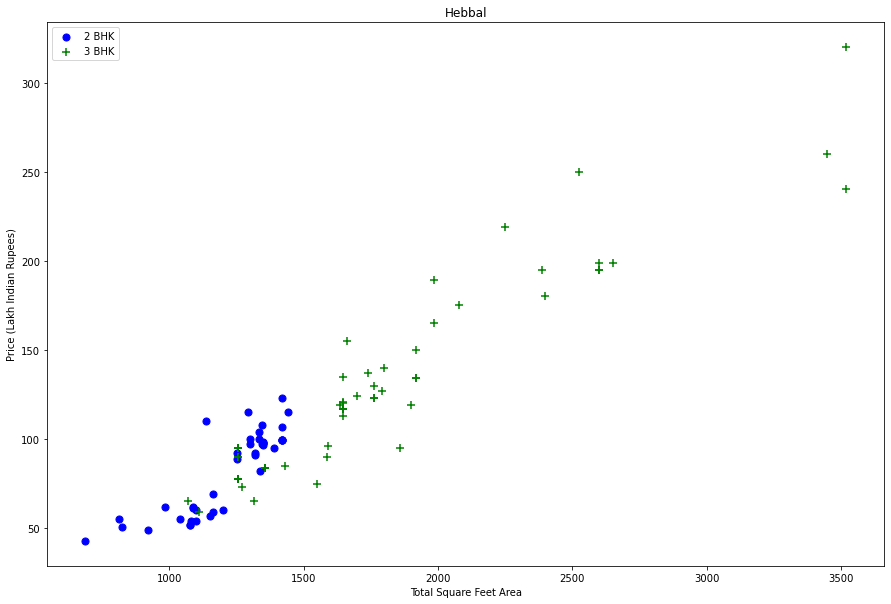

In [70]:
plot_scatter_chart(house_price_pred2,"Hebbal")

In [71]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
house_price_pred3 = remove_bhk_outliers(house_price_pred2)
house_price_pred3.shape

(7369, 7)

Text(0, 0.5, 'Count')

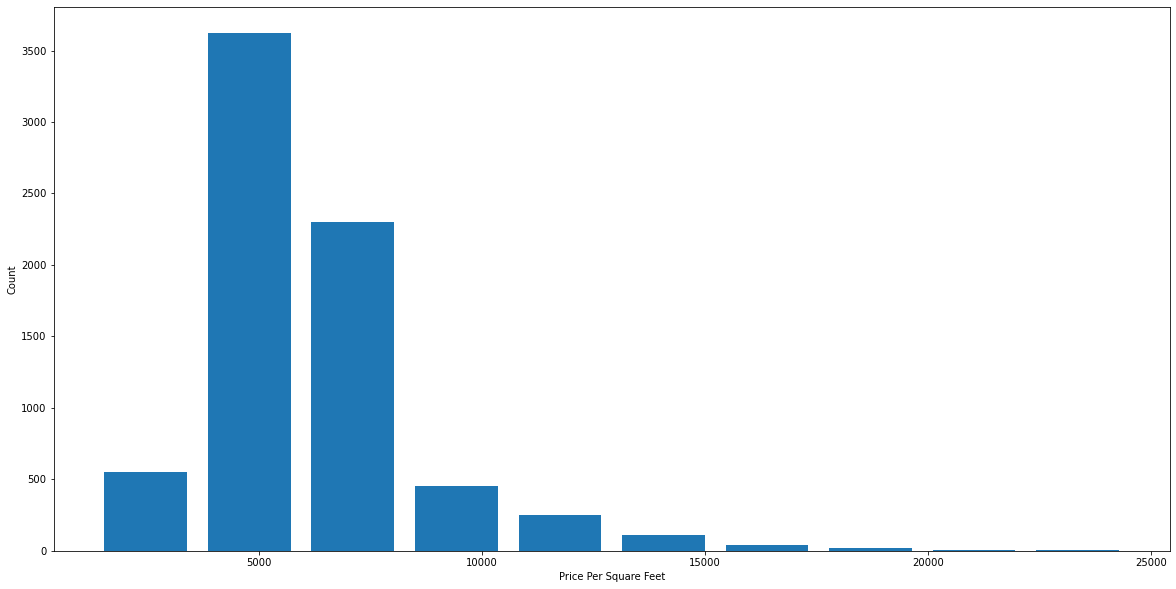

In [72]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(house_price_pred3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#Normal Distribution

Text(0, 0.5, 'Count')

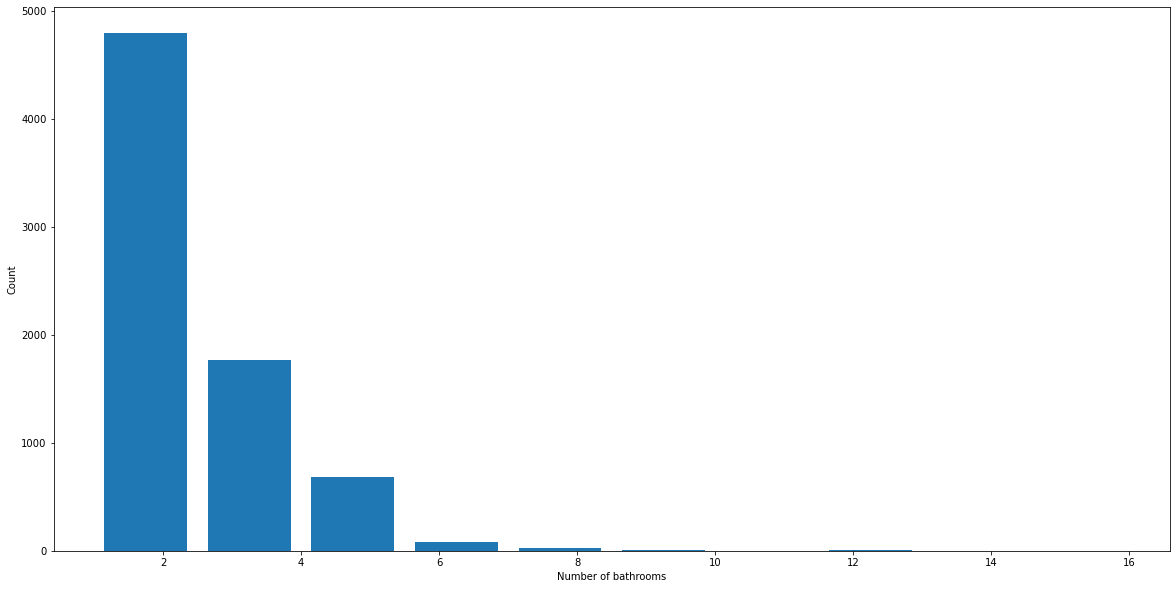

In [73]:
plt.hist(house_price_pred3.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [74]:
house_price_pred4 = house_price_pred3[house_price_pred3.bath<house_price_pred3.bhk+2]
house_price_pred4.shape

(7291, 7)

In [76]:
house_price_pred5 = house_price_pred4.drop(['size','price_per_sqft'],axis='columns')

house_price_pred5.shape

(7291, 5)

size and price_per_sqft can be dropped because they were used only for outlier detection. Now the dataset is neat and clean and we can go for machine learning training

In [52]:
house_price_pred5.head(5)

,location,total_sqft,bath,price,bhk
585,BTM 1st Stage,3300.0,14.0,500.0,9
1642,Chikkabanavar,2460.0,7.0,80.0,4
5305,Nagasandra,7000.0,8.0,450.0,4
6792,Thanisandra,1806.0,6.0,116.0,3
8476,other,11338.0,9.0,1000.0,6


In [77]:
correlation = house_price_pred5.corr()

Understanding the correlation between various features in the dataset

Positive Correlation

Negative Correlation

<AxesSubplot:>

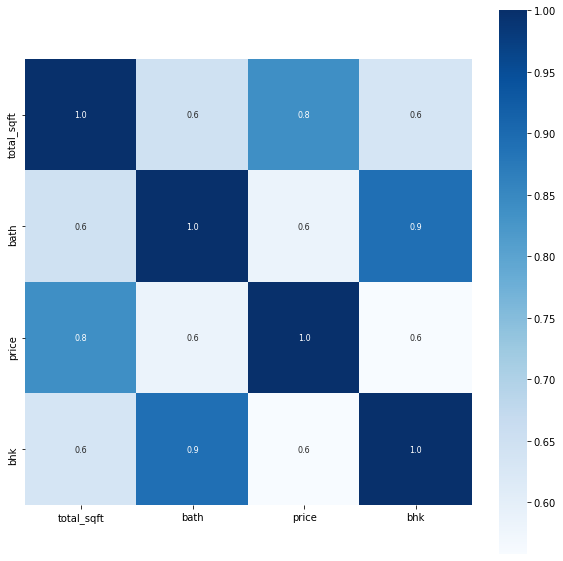

In [78]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [79]:
price_by_bhk=house_price_pred5.bhk.value_counts()
price_by_bhk

2     3662
3     2469
1      517
4      501
5       68
6       41
8       14
7        9
9        5
11       2
16       1
13       1
10       1
Name: bhk, dtype: int64

<AxesSubplot:>

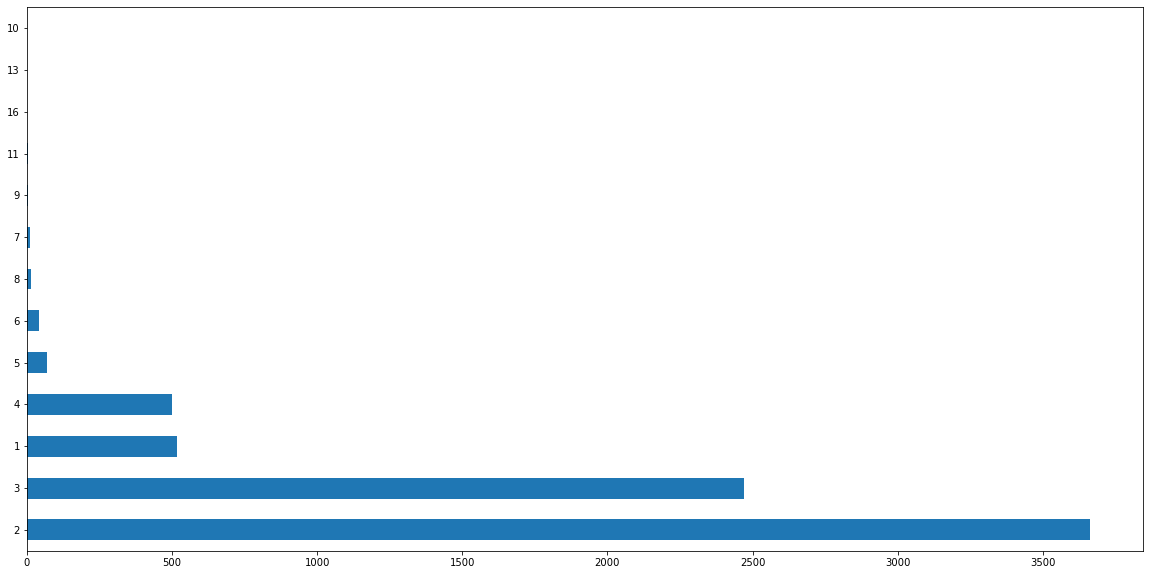

In [80]:
price_by_bhk.plot(kind='barh')

In [84]:
fig1 = px.scatter(house_price_pred5, 
           x="price",
           color="total_sqft",
           hover_name="bhk",
           title = 'Price Distribution',
           )
fig1.update_layout(xaxis_title='House Price', 
                  yaxis_title='Count of Houses',
                  legend_title='total_sqft')

In [94]:
house_price_predf = house_price_pred5.drop('location',axis = 'columns')
house_price_predf.head

<bound method NDFrame.head of        total_sqft  bath  price  bhk
0          2850.0   4.0  428.0    4
1          1630.0   3.0  194.0    3
2          1875.0   2.0  235.0    3
3          1200.0   2.0  130.0    3
4          1235.0   2.0  148.0    2
...           ...   ...    ...  ...
10213      1200.0   2.0   70.0    2
10214      1800.0   1.0  200.0    1
10217      1353.0   2.0  110.0    2
10218       812.0   1.0   26.0    1
10221      3600.0   5.0  400.0    4

[7291 rows x 4 columns]>

Splitting the data and Target

In [95]:
X = house_price_predf.drop(['price'], axis=1)
Y = house_price_predf['price']

In [96]:
print(X)
print(Y)

       total_sqft  bath  bhk
0          2850.0   4.0    4
1          1630.0   3.0    3
2          1875.0   2.0    3
3          1200.0   2.0    3
4          1235.0   2.0    2
...           ...   ...  ...
10213      1200.0   2.0    2
10214      1800.0   1.0    1
10217      1353.0   2.0    2
10218       812.0   1.0    1
10221      3600.0   5.0    4

[7291 rows x 3 columns]
0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10213     70.0
10214    200.0
10217    110.0
10218     26.0
10221    400.0
Name: price, Length: 7291, dtype: float64


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [98]:
print(X.shape, X_train.shape, X_test.shape)

(7291, 3) (5832, 3) (1459, 3)


Model Training

XGBoost Regressor

In [99]:
# loading the model
model = XGBRegressor()

In [100]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Evaluation

Prediction on training data

In [102]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [103]:
print(training_data_prediction)

[ 25.602322 289.18506   96.27685  ...  56.123714  56.123714  83.11127 ]


In [104]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.927864627489195
Mean Absolute Error :  15.847072828538789


Visualizing the actual Prices and predicted prices

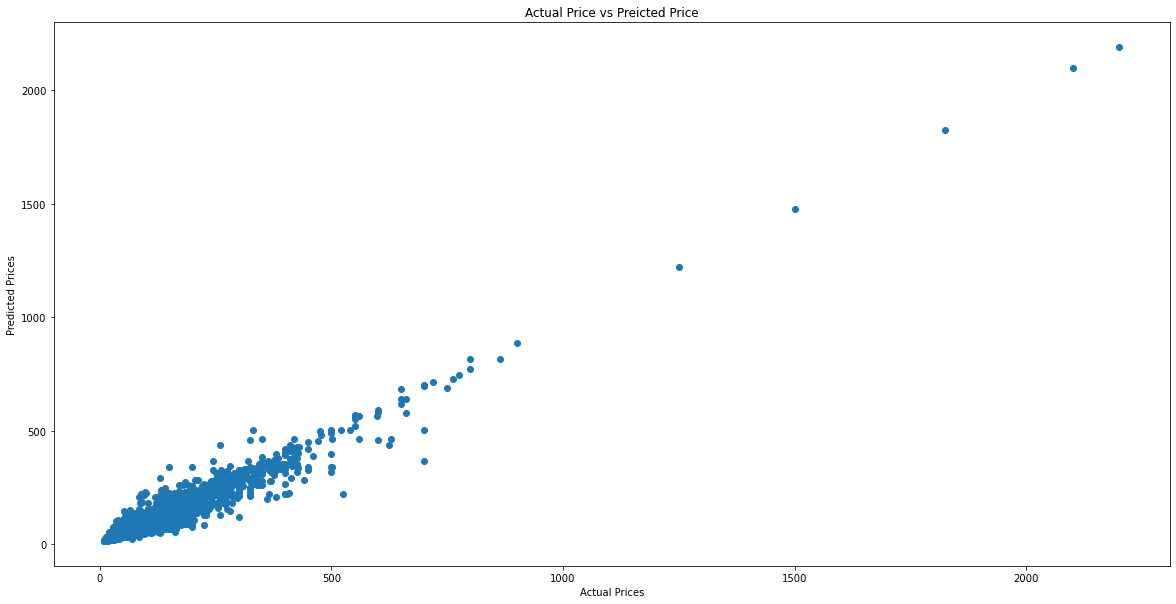

In [105]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data 

In [106]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [107]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5532581247742365
Mean Absolute Error :  23.404739281417083


In [109]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.626587457891085